In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import glob
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import math
from torch.utils.data import Dataset, DataLoader, TensorDataset

In [2]:
df_600=pd.DataFrame()
df_600=pd.read_csv("600.csv")

df_60=pd.DataFrame()
df_60=pd.read_csv("60.csv")

In [4]:
#sb.lineplot(df_60[0])
#sb.lineplot(df_600[0])

In [5]:
df_60.shape

(100, 5500)

In [6]:
# whether to run on GPU or CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using {device} device")
#print(torch.cuda.get_device_name(0))

Using cpu device


In [7]:
tensor_60 = torch.tensor(df_60.values,dtype=torch.float32)
tensor_600 = torch.tensor(df_60.values,dtype=torch.float32)
print(tensor_60.shape)
print(tensor_600.shape)

torch.Size([100, 5500])
torch.Size([100, 5500])


In [8]:
print(tensor_60.dtype)

torch.float32


In [9]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.fc1 = nn.Linear(5500, 100)
        self.fc2 = nn.Linear(100, 300)
        self.fc3 = nn.Linear(300, 200)
        self.fc4 = nn.Linear(200, 100)
        self.fc5 = nn.Linear(100, 5500)
        self.activation = nn.Tanh()
    def forward(self, x):
        x = nn.ReLU()(self.fc1(x))
        x = nn.ReLU()(self.fc2(x))
        x = nn.ReLU()(self.fc3(x))
        x = nn.ReLU()(self.fc4(x))
        x = self.fc5(x)
        return x

In [10]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.fc1 = nn.Linear(5500, 100)
        self.fc2 = nn.Linear(100, 300)
        self.fc3 = nn.Linear(300, 200)
        self.fc4 = nn.Linear(200, 100)
        self.fc5 = nn.Linear(100, 5500)
        self.activation = nn.Sigmoid()
    def forward(self, x):
        x = nn.ReLU()(self.fc1(x))
        x = nn.ReLU()(self.fc2(x))
        x = nn.ReLU()(self.fc3(x))
        x = nn.ReLU()(self.fc4(x))
        x = nn.Sigmoid()(self.fc5(x))
        return x


In [11]:
def train_gan(generator, discriminator, train_loader, num_epochs):
    criterion = nn.BCELoss()
    optimizer_g = optim.Adam(generator.parameters(), lr=0.001)
    optimizer_d = optim.Adam(discriminator.parameters(), lr=0.001)
    #total_step = len(data_loader)
    
    #def reset_grad():
    #d_optimizer.zero_grad()
    #g_optimizer.zero_grad()
    
    # define labels for real and fake samples
    real_label = torch.ones([5500])
    fake_label = torch.zeros([5500])
    
    # create empty lists to store loss values
    d_losses = []
    g_losses = []

    for epoch in range(num_epochs):
        
        for  i in range (0,100):
            x_real = train_loader[i] #.double()
            #print(x_real.shape)
            # train discriminator
            # train discriminator on real samples
            
            d_real = discriminator(x_real)
            #print(d_real.shape)
            loss_d_real = criterion(d_real, real_label)
            real_score = loss_d_real.mean().item()
            
            # generate fake samples
            x_fake = generator(torch.randn(x_real.shape[0]).to(device))
            
            # train discriminator on fake samples
            d_fake = discriminator(x_fake.detach())
            #print(d_fake.shape)
            loss_d_fake = criterion(d_fake, fake_label)
            fake_score = loss_d_fake.mean().item()
            
            
            # calculate total discriminator loss
            d_loss = loss_d_real + loss_d_fake
            optimizer_d.zero_grad()
            optimizer_g.zero_grad()
            loss_d_fake.backward()
            optimizer_d.step()
            
            # train generator
            # generate samples
            x_fake = generator(torch.randn(x_real.shape[0]).to(device))
            
            d_fake = discriminator(x_fake)
            
            loss_g = criterion(d_fake, real_label)
            loss_g.backward()
            optimizer_g.step()
        
            # calculate total generator loss
            g_loss = loss_g
        
            # store loss values
            d_losses.append(d_loss.item())
            g_losses.append(g_loss.item())
        
            # print loss values
            if epoch % 10 == 0:
                print(f"Epoch {epoch+1}/{num_epochs}, D_loss: {d_loss.item():.4f}, G_loss: {g_loss.item():.4f}")

    # plot loss curves
    plt.plot(d_losses, label="Discriminator")
    plt.plot(g_losses, label="Generator")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("GAN Training Loss")
    plt.legend()
    plt.show()


Epoch 1/100, D_loss: 1.3872, G_loss: 0.6951
Epoch 1/100, D_loss: 1.3872, G_loss: 0.6971
Epoch 1/100, D_loss: 1.3868, G_loss: 0.7001
Epoch 1/100, D_loss: 1.3857, G_loss: 0.7047
Epoch 1/100, D_loss: 1.3833, G_loss: 0.7117
Epoch 1/100, D_loss: 1.3792, G_loss: 0.7220
Epoch 1/100, D_loss: 1.3730, G_loss: 0.7373
Epoch 1/100, D_loss: 1.3636, G_loss: 0.7583
Epoch 1/100, D_loss: 1.3516, G_loss: 0.7860
Epoch 1/100, D_loss: 1.3355, G_loss: 0.8175
Epoch 1/100, D_loss: 1.3227, G_loss: 0.8642
Epoch 1/100, D_loss: 1.3095, G_loss: 0.8942
Epoch 1/100, D_loss: 1.3664, G_loss: 0.8496
Epoch 1/100, D_loss: 1.3364, G_loss: 0.9402
Epoch 1/100, D_loss: 1.2906, G_loss: 1.0335
Epoch 1/100, D_loss: 1.1760, G_loss: 1.4062
Epoch 1/100, D_loss: 1.1214, G_loss: 1.7361
Epoch 1/100, D_loss: 0.9452, G_loss: 2.3250
Epoch 1/100, D_loss: 1.0124, G_loss: 2.0164
Epoch 1/100, D_loss: 1.0929, G_loss: 4.2194
Epoch 1/100, D_loss: 1.0598, G_loss: 3.7168
Epoch 1/100, D_loss: 1.0827, G_loss: 2.9050
Epoch 1/100, D_loss: 1.1356, G_l

Epoch 11/100, D_loss: 41.3635, G_loss: 16.6680
Epoch 11/100, D_loss: 52.4810, G_loss: 16.6655
Epoch 11/100, D_loss: 49.0750, G_loss: 16.6690
Epoch 11/100, D_loss: 41.2034, G_loss: 16.6724
Epoch 11/100, D_loss: 40.7749, G_loss: 16.6759
Epoch 11/100, D_loss: 39.3599, G_loss: 16.6793
Epoch 11/100, D_loss: 44.1340, G_loss: 16.6828
Epoch 11/100, D_loss: 52.6813, G_loss: 16.6862
Epoch 11/100, D_loss: 52.2978, G_loss: 16.6895
Epoch 11/100, D_loss: 40.2855, G_loss: 16.6929
Epoch 11/100, D_loss: 48.9073, G_loss: 16.7558
Epoch 11/100, D_loss: 38.3162, G_loss: 16.6997
Epoch 11/100, D_loss: 53.7578, G_loss: 16.7030
Epoch 11/100, D_loss: 47.6377, G_loss: 16.7064
Epoch 11/100, D_loss: 49.2688, G_loss: 16.7514
Epoch 11/100, D_loss: 44.5267, G_loss: 16.7131
Epoch 21/100, D_loss: 35.2170, G_loss: 18.3534
Epoch 21/100, D_loss: 43.6874, G_loss: 18.3545
Epoch 21/100, D_loss: 48.4156, G_loss: 18.3556
Epoch 21/100, D_loss: 36.7354, G_loss: 18.3567
Epoch 21/100, D_loss: 42.6241, G_loss: 18.3579
Epoch 21/100,

Epoch 31/100, D_loss: 47.4260, G_loss: 19.2628
Epoch 31/100, D_loss: 60.0949, G_loss: 19.2635
Epoch 31/100, D_loss: 56.1428, G_loss: 19.2642
Epoch 31/100, D_loss: 47.2057, G_loss: 19.2649
Epoch 31/100, D_loss: 46.7556, G_loss: 19.2656
Epoch 31/100, D_loss: 45.0968, G_loss: 19.2663
Epoch 31/100, D_loss: 50.5355, G_loss: 19.2670
Epoch 31/100, D_loss: 60.2038, G_loss: 19.2677
Epoch 31/100, D_loss: 59.7821, G_loss: 19.2684
Epoch 31/100, D_loss: 46.1153, G_loss: 19.2691
Epoch 31/100, D_loss: 55.8817, G_loss: 19.2698
Epoch 31/100, D_loss: 43.8558, G_loss: 19.2705
Epoch 31/100, D_loss: 61.4179, G_loss: 19.2712
Epoch 31/100, D_loss: 54.4345, G_loss: 19.2719
Epoch 31/100, D_loss: 56.3059, G_loss: 19.2726
Epoch 31/100, D_loss: 50.8681, G_loss: 19.2734
Epoch 41/100, D_loss: 37.8680, G_loss: 19.8255
Epoch 41/100, D_loss: 46.9225, G_loss: 19.8260
Epoch 41/100, D_loss: 51.9795, G_loss: 19.8266
Epoch 41/100, D_loss: 39.5124, G_loss: 19.8272
Epoch 41/100, D_loss: 45.7756, G_loss: 19.8277
Epoch 41/100,

Epoch 51/100, D_loss: 49.6550, G_loss: 20.3736
Epoch 51/100, D_loss: 49.1911, G_loss: 20.3741
Epoch 51/100, D_loss: 47.4350, G_loss: 20.3745
Epoch 51/100, D_loss: 53.1406, G_loss: 20.3750
Epoch 51/100, D_loss: 63.2406, G_loss: 20.3755
Epoch 51/100, D_loss: 62.8114, G_loss: 20.3759
Epoch 51/100, D_loss: 48.4919, G_loss: 20.3764
Epoch 51/100, D_loss: 58.7088, G_loss: 20.3768
Epoch 51/100, D_loss: 46.1323, G_loss: 20.3773
Epoch 51/100, D_loss: 64.5281, G_loss: 20.3778
Epoch 51/100, D_loss: 57.2023, G_loss: 20.3782
Epoch 51/100, D_loss: 59.1750, G_loss: 20.3787
Epoch 51/100, D_loss: 53.4610, G_loss: 20.3791
Epoch 61/100, D_loss: 39.4994, G_loss: 20.7707
Epoch 61/100, D_loss: 48.8876, G_loss: 20.7711
Epoch 61/100, D_loss: 54.1401, G_loss: 20.7715
Epoch 61/100, D_loss: 41.2042, G_loss: 20.7719
Epoch 61/100, D_loss: 47.7042, G_loss: 20.7723
Epoch 61/100, D_loss: 43.4169, G_loss: 20.7727
Epoch 61/100, D_loss: 44.7975, G_loss: 20.7731
Epoch 61/100, D_loss: 38.0502, G_loss: 20.7735
Epoch 61/100,

Epoch 71/100, D_loss: 50.8863, G_loss: 21.1972
Epoch 71/100, D_loss: 49.0667, G_loss: 21.1975
Epoch 71/100, D_loss: 54.9493, G_loss: 21.1979
Epoch 71/100, D_loss: 65.3290, G_loss: 21.1983
Epoch 71/100, D_loss: 64.8977, G_loss: 21.1987
Epoch 71/100, D_loss: 50.1461, G_loss: 21.1990
Epoch 71/100, D_loss: 60.6607, G_loss: 21.1994
Epoch 71/100, D_loss: 47.7268, G_loss: 21.1998
Epoch 71/100, D_loss: 66.6712, G_loss: 21.2002
Epoch 71/100, D_loss: 59.1174, G_loss: 21.2005
Epoch 71/100, D_loss: 61.1585, G_loss: 21.2009
Epoch 71/100, D_loss: 55.2615, G_loss: 21.2013
Epoch 81/100, D_loss: 40.7348, G_loss: 21.5280
Epoch 81/100, D_loss: 50.3532, G_loss: 21.5284
Epoch 81/100, D_loss: 55.7424, G_loss: 21.5287
Epoch 81/100, D_loss: 42.4821, G_loss: 21.5291
Epoch 81/100, D_loss: 49.1450, G_loss: 21.5294
Epoch 81/100, D_loss: 44.7483, G_loss: 21.5298
Epoch 81/100, D_loss: 46.1654, G_loss: 21.5301
Epoch 81/100, D_loss: 39.2471, G_loss: 21.5305
Epoch 81/100, D_loss: 40.3209, G_loss: 21.5308
Epoch 81/100,

Epoch 91/100, D_loss: 52.2173, G_loss: 21.9012
Epoch 91/100, D_loss: 50.3502, G_loss: 21.9015
Epoch 91/100, D_loss: 56.3597, G_loss: 21.9018
Epoch 91/100, D_loss: 66.9379, G_loss: 21.9022
Epoch 91/100, D_loss: 66.5067, G_loss: 21.9025
Epoch 91/100, D_loss: 51.4449, G_loss: 21.9028
Epoch 91/100, D_loss: 62.1728, G_loss: 21.9032
Epoch 91/100, D_loss: 48.9843, G_loss: 21.9035
Epoch 91/100, D_loss: 68.3228, G_loss: 21.9038
Epoch 91/100, D_loss: 60.6042, G_loss: 21.9042
Epoch 91/100, D_loss: 62.6950, G_loss: 21.9045
Epoch 91/100, D_loss: 56.6672, G_loss: 21.9048


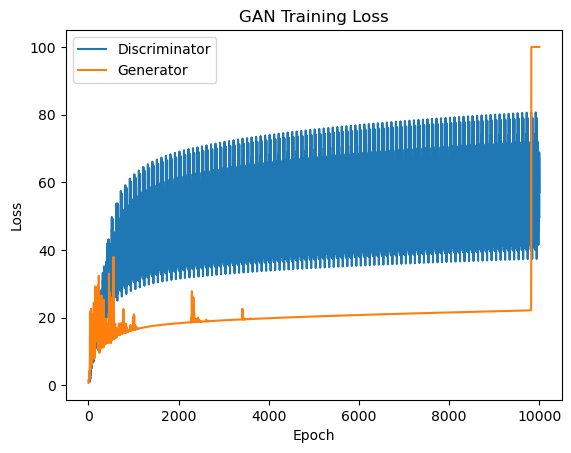

In [12]:
# create generator and discriminator
generator = Generator()

discriminator = Discriminator()

# train GAN
num_epochs = 100
learning_rate=0.001
train_gan(generator, discriminator, tensor_60, num_epochs)
